<a href="https://colab.research.google.com/github/koka-prathyusha/projects/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Data : Images
# 

In [2]:
import numpy as np
a=np.array([[1,2],
            [2,4]])
a.ndim

2

In [3]:
#flattening the array into flat data
a.flatten()

array([1, 2, 2, 4])

In [4]:
#preprocessing
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

In [5]:
#Transform is used to resize the picture into apptopriate size
#Normalization is not used when using the resize
datadir = '/content/drive/MyDrive/IMAGES'

categories = ['fishes','butterfly'] # Name the folder with these categories
target = []
flat_data = []
images=[]
for i in categories:
  class_num=categories.index(i)
  path = os.path.join(datadir,i) #create path to use images print(path)
  for img in os.listdir(path):   #it is listing the path
    #print(img)
    img_array = imread(os.path.join(path,img))
    #print(img_array)
    img_resize = resize(img_array,(150,150,3)) # Value gets normalized/converted 0-1 from 0-255
    flat_data.append(img_resize.flatten())
    images.append(img_resize)
    target.append(class_num)
    

flat_data = np.array(flat_data)
target = np.array(target)
images=np.array(images)

In [6]:
flat_data[0]

array([0.1105098 , 0.0923383 , 0.10142484, ..., 0.21199007, 0.36337569,
       0.17565333])

In [7]:
150*150*3

67500

In [8]:
target

array([0, 0, 0, 0, 1, 1, 1, 1])

<BarContainer object of 2 artists>

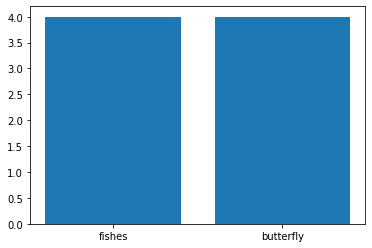

In [9]:
unique,count=np.unique(target,return_counts=True)
plt.bar(categories,count)

In [10]:
df=pd.DataFrame(flat_data)
df['Target']=target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.110510,0.092338,0.101425,0.106461,0.103015,0.102853,0.100484,0.122651,0.113033,0.096433,0.142342,0.121636,0.094742,0.162806,0.130036,0.154362,0.232771,0.189656,0.199516,0.277948,0.232824,0.199027,0.280478,0.230282,0.199792,0.274602,0.227544,0.203615,0.258168,0.206508,0.205189,0.249509,0.193457,2.077286e-01,0.258604,0.199784,0.211333,0.274118,0.212680,0.226654,...,0.108706,0.330928,0.182065,0.127574,0.307234,0.198162,0.033203,0.169203,0.098144,0.017804,0.107197,0.062701,0.067683,0.134510,0.103488,0.038165,0.104549,0.074125,0.080658,0.174259,0.113716,0.191690,0.312718,0.212928,0.253896,0.407936,0.255308,0.225220,0.395642,0.210716,0.204873,0.377187,0.177775,0.173280,0.337951,0.142304,0.211990,0.363376,0.175653,0
1,0.298824,0.338039,0.130196,0.288235,0.327451,0.119608,0.278588,0.317804,0.109961,0.274618,0.313834,0.105203,0.271090,0.310305,0.102462,0.266902,0.306118,0.098275,0.270588,0.309804,0.101961,0.270554,0.316010,0.096010,0.269908,0.336575,0.068558,0.265987,0.332654,0.057213,0.267320,0.334327,0.050525,2.717527e-01,0.342484,0.045072,0.274340,0.348850,0.036915,0.278092,...,0.452601,0.432993,0.409464,0.463033,0.445699,0.415346,0.460157,0.444471,0.409176,0.451748,0.435974,0.400680,0.439643,0.424235,0.388941,0.431425,0.415739,0.380444,0.423268,0.407582,0.372288,0.419268,0.403582,0.368288,0.422850,0.407712,0.371869,0.410562,0.415346,0.367425,0.407503,0.415346,0.364366,0.412575,0.420418,0.368077,0.416994,0.424837,0.373857,0
2,0.000026,0.007843,0.000000,0.000026,0.007843,0.000000,0.000026,0.007843,0.000000,0.000026,0.007817,0.000000,0.000026,0.007817,0.000000,0.000026,0.007817,0.000000,0.000026,0.007817,0.000993,0.000026,0.005480,0.003922,0.000026,0.003922,0.007634,0.000026,0.003922,0.011765,0.000026,0.003922,0.011765,3.485839e-07,0.003922,0.007895,0.000000,0.009150,0.000000,0.000000,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003918,0.003918,0.003918,0.020724,0.020724,0.020724,0.045395,0.045395,0.045395,0
3,0.281160,0.422336,0.179351,0.264891,0.405964,0.166616,0.268769,0.408107,0.178230,0.283359,0.428667,0.217647,0.290935,0.444899,0.255131,0.274785,0.446968,0.281007,0.206370,0.406632,0.262527,0.189647,0.414651,0.290776,0.266725,0.517430,0.411224,0.376100,0.639421,0.538035,0.358765,0.665843,0.582334,2.815404e-01,0.560988,0.456063,0.194458,0.437516,0.300261,0.139619,...,0.628641,0.784562,0.744667,0.648119,0.804011,0.770151,0.613333,0.759551,0.734922,0.554421,0.693151,0.677347,0.519128,0.648696,0.605728,0.509318,0.648212,0.618267,0.447769,0.601442,0.584052,0.262922,0.422818,0.427132,0.267710,0.439236,0.462540,0.418901,0.591659,0.626326,0.456910,0.629522,0.664627,0.341333,0.509961,0.536941,0.194545,0.357630,0.375617,0
4,0.584680,0.427817,0.154993,0.563804,0.410863,0.143751,0.534039,0.385608,0.131882,0.501530,0.360432,0.117334,0.469033,0.335699,0.106719,0.425778,0.303150,0.085346,0.388394,0.269139,0.059688,0.354159,0.240041,0.039658,0.330719,0.215961,0.027240,0.338664,0.212431,0.039216,0.349255,0.219725,0.039331,3.707421e-01,0.240899,0.043046,0.413703,0.277428,0.060761,0.466827,...,0.832147,0.609712,0.051663,0.835020,0.603739,0.054947,0.831127,0.599846,0.058275,0.813566,0.575017,0.036913,0.791762,0.548625,0.017843,0.801974,0.548837,0.027518,0.805961,0.544878,0.030915,0.802588,0.539818,0.027060,0.795792,0.532458,0.023152,0.788129,0.552612,0.042302,0.798549,0.567268,0.057071,0.833190,0.601909,0.091739,0.856719,0.625438,0.122980,1


In [11]:
# Taking ip and op
x = df.iloc[:,2:-1].values
y = df.iloc[:,1].values

In [12]:
#split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,random_state=0)

In [13]:
# Normalization : Bringing value in a scale of 0-1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([1, 0])

In [15]:
x_train

array([[0.22316892, 0.27109457, 0.03221368, ..., 0.33593748, 0.37171466,
        0.99303346],
       [1.        , 1.        , 1.        , ..., 0.18329911, 0.33764733,
        0.29803049],
       [0.20223572, 0.36410382, 0.08725005, ..., 0.        , 0.16122023,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.02634537, 0.17921643,
        0.20849313],
       [0.43397571, 0.39380461, 0.03379437, ..., 0.38761533, 0.        ,
        0.6286491 ],
       [0.56193456, 0.37015106, 0.05997805, ..., 1.        , 1.        ,
        0.        ]])

In [16]:
y_train

array([0, 1, 0, 0, 1, 1])

In [23]:
y_test

array([1, 0])

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [24]:
accuracy_score(y_pred,y_test)

1.0

In [25]:
confusion_matrix(y_pred,y_test)

array([[1, 0],
       [0, 1]])

In [ ]:
# 

In [27]:
#svm-support vector machine
from sklearn.model_selection import GridSearchCV
from sklearn import svm 
param_grid=[
            {'c':[1,10,100],'kernel':['linear']},
             {'c':[1,10,100],'gamma':[0.01,0.001],'kernel':['rbf']},   
]

svc = svm.SVC(probability=True)  
clf= GridSearchCV(svc,param_grid)  
clf
#clf.fit(x_train,y_train)      
#grid = GridSearchCV(SVC(),param_grid)
#grid.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'c': [1, 10, 100], 'kernel': ['linear']},
                         {'c': [1, 10, 100], 'gamma': [0.01, 0.001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:

y_pred

array([1, 0])

(157, 279, 3)
predicted output: butterfly


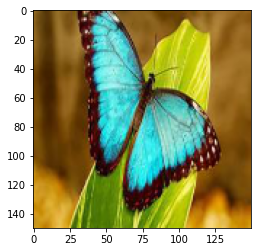

In [33]:
#Testing a brand new image
flat_data=[]
img=imread('/content/drive/MyDrive/IMAGES/butterfly/butterfly-1.jpg')
img_resize =resize(img,(150,150,3))
flat_data.append(img_resize.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resize)
y_out= model.predict(flat_data)
y_out=categories[y_out[0]]
print(f'predicted output: {y_out}')

In [34]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 5.7MB/s 
     |████████████████████████████████| 92kB 13.7MB/s 
     |████████████████████████████████| 174kB 45.1MB/s 
     |████████████████████████████████| 4.2MB 38.4MB/s 
     |████████████████████████████████| 112kB 44.4MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 122kB 43.0MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=3fe532ec0904b515594fdd34b8a09593784ec40e307c0ae1a06be6d1acdddca2
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0
  Found existing installation: ipykernel 4

     |████████████████████████████████| 747kB 6.9MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19246 sha256=ea602e8e3b75ba25fffa64bfd9cc9865cbfb0bdddecc546a260b8fe4c0db72df
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok
